In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_traindf = pd.read_csv('Datasets/Train/x_train.csv')
x_train = np.array(x_traindf)

In [3]:
y_traindf = pd.read_csv('Datasets/Train/y_train.csv')
y_train = np.array(y_traindf)

In [4]:
x_traindf['y']=y_traindf

In [5]:
print(x_train,y_train)

[[332.83]
 [333.87]
 [330.75]
 ...
 [797.86]
 [794.23]
 [785.93]] [[333.87]
 [330.75]
 [328.77]
 ...
 [794.23]
 [785.93]
 [782.78]]


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
totalDataset = zip(x_train,y_train)

In [8]:
totalDataset = list(totalDataset)
print(len(totalDataset[1]))

2


In [9]:
min_max_scaler = MinMaxScaler()
totalDataset = min_max_scaler.fit_transform(x_traindf)

In [10]:
x_train = []
y_train = []
for i in range(totalDataset.shape[0]):
    x_train.append(totalDataset[i][0])
    y_train.append(totalDataset[i][1])
    

In [11]:
x_train = np.array(x_train)

In [12]:
y_train=np.array(y_train)

In [13]:
x_train = x_train.reshape((1257,1))

In [14]:
print(x_train.shape,y_train.shape)

(1257, 1) (1257,)


In [15]:
def build_timeseries(mat,y_col_index):
    dim_0 = mat.shape[0] - 10
    dim_1=1
    x = np.zeros((dim_0,10,dim_1))
    y = np.zeros((dim_0,))
    
    for i in range(dim_0):
        x[i] = mat[i:10+i]
        y[i] = y_col_index[10+i]
    return x,y

In [16]:
x,y = build_timeseries(x_train,y_train)

In [17]:
x_train = x[:1000]
x_test = x[1000:]
y_train = y[:1000]
y_test = y[1000:]

In [18]:
print(x.shape,y.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1247, 10, 1) (1247,)
(1000, 10, 1)
(247, 10, 1)
(1000,)
(247,)


In [19]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [20]:
# x_t= trim_dataset(x,32)
# y_t = trim_dataset(y,32)
print(y)

[0.07113377 0.02463257 0.02244757 ... 0.95807422 0.94257381 0.93669113]


In [21]:
x_t = x
y_t = y

In [22]:
print(x_t.shape)

(1247, 10, 1)


In [23]:

from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [35]:

lstm_model = Sequential()
lstm_model.add(LSTM(100, return_sequences=True,input_shape=(10,1),))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(50,return_sequences=False))
lstm_model.add(Dense(1,activation = 'sigmoid'))
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 10, 50)            30200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 91,251
Trainable params: 91,251
Non-trainable params: 0
__________________________________________________

In [36]:
lstm_model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['accuracy'])

In [37]:
lstm_model.fit(x,y,epochs=30,validation_split = 0.2)

Train on 997 samples, validate on 250 samples
Epoch 1/30
997/997 [==============================] - 2s 2ms/step - loss: 0.0301 - accuracy: 0.0010 - val_loss: 0.0041 - val_accuracy: 0.0040
Epoch 2/30
997/997 [==============================] - 1s 697us/step - loss: 0.0035 - accuracy: 0.0010 - val_loss: 0.0105 - val_accuracy: 0.0040
Epoch 3/30
997/997 [==============================] - 1s 743us/step - loss: 0.0026 - accuracy: 0.0010 - val_loss: 0.0083 - val_accuracy: 0.0040
Epoch 4/30
997/997 [==============================] - 1s 661us/step - loss: 0.0026 - accuracy: 0.0010 - val_loss: 0.0099 - val_accuracy: 0.0040
Epoch 5/30
997/997 [==============================] - 1s 641us/step - loss: 0.0024 - accuracy: 0.0010 - val_loss: 0.0087 - val_accuracy: 0.0040
Epoch 6/30
997/997 [==============================] - 1s 655us/step - loss: 0.0021 - accuracy: 0.0010 - val_loss: 0.0077 - val_accuracy: 0.0040
Epoch 7/30
997/997 [==============================] - 1s 657us/step - loss: 0.0020 - accurac

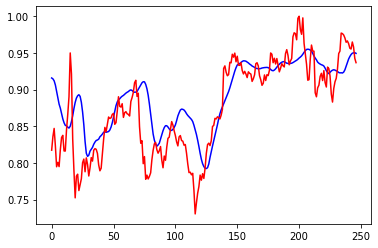

In [38]:

y_ = lstm_model.predict(x_test)
x_axis = np.arange(y_.shape[0])
plt.plot(x_axis,y_,c='blue')
plt.plot(x_axis,y_test,c='red')
plt.show()

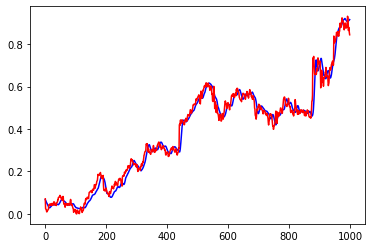

In [39]:
y_train_pred = lstm_model.predict(x_train)
x_axis = np.arange(y_train_pred.shape[0])
plt.plot(x_axis,y_train_pred,c='blue')
plt.plot(x_axis,y_train,c='red')
plt.show()